# Table of Content
1. Libraries
2. Loading the Dataset
3. Data Preprocessing
  - Finding the null values
  - Data Cleaning
4. Exploratory Data Analysis
5. Machine Learning
  - Data Preprocessing pipline
  - ML pipline
  - Decision Tree
  - KNN
  - Naive Bayes
  - Logistic Regression
  - Random Forest
  - Gradient Boosting Classifier
4. Feature Engineering
  - Select KBest
  - Extra Trees Classifier
  - Correlation
  - Mutual Info Classifier 
7. Model training by Correlation Features
8. Model training by Select KBest Features
9. Model training by Extra Trees Classifier Features
10. Model training by Mutual Info Classifier Features
11. Conclusion



In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ddvram","key":"3d23e18fca89e72b3faaeafad6be5c5e"}'}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

loan-prediction-based-on-customer-behavior.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! unzip loan-prediction-based-on-customer-behavior

Archive:  loan-prediction-based-on-customer-behavior.zip
replace Sample Prediction Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sample Prediction Dataset.csv  
replace Test Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test Data.csv           
replace Training Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Training Data.csv       


# Libraries <a id="libraries"></a>


In [35]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from collections import defaultdict
# Visulisation
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score


# Loading the Dataset

In [68]:
train = pd.read_csv('/content/Training Data.csv')
test = pd.read_csv('/content/Test Data.csv')
sample = pd.read_csv('/content/Sample Prediction Dataset.csv')

# Data Preprocessing

In [69]:
train.head()

Id   Income  Age  ...  CURRENT_JOB_YRS CURRENT_HOUSE_YRS Risk_Flag
0   1  1303834   23  ...                3                13         0
1   2  7574516   40  ...                9                13         0
2   3  3991815   66  ...                4                10         0
3   4  6256451   41  ...                2                12         1
4   5  5768871   47  ...                3                14         1

[5 rows x 13 columns]

In [70]:
test.head()

ID   Income  Age  ...        STATE CURRENT_JOB_YRS CURRENT_HOUSE_YRS
0   1  7393090   59  ...  West Bengal               4                13
1   2  1215004   25  ...  Maharashtra               5                10
2   3  8901342   50  ...  Maharashtra               9                14
3   4  1944421   49  ...  Maharashtra               3                12
4   5    13429   25  ...  West Bengal              13                11

[5 rows x 12 columns]

In [71]:
sample.head()

id  risk_flag
0   1          0
1   2          0
2   3          1
3   4          0
4   5          0

## Droping ID and Merging sample and testset

In [72]:
# Dropping ID 
train = train.drop(['Id'],axis=1)
test = test.drop(['ID'],axis=1)
# Merging the Risk_flag From sample to test set
test = pd.concat([test,sample['risk_flag']],axis=1)
test.head()

Income  Age  Experience  ... CURRENT_JOB_YRS CURRENT_HOUSE_YRS risk_flag
0  7393090   59          19  ...               4                13         0
1  1215004   25           5  ...               5                10         0
2  8901342   50          12  ...               9                14         1
3  1944421   49           9  ...               3                12         0
4    13429   25          18  ...              13                11         0

[5 rows x 12 columns]

## Checking the null values or missing values

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             28000 non-null  int64 
 1   Age                28000 non-null  int64 
 2   Experience         28000 non-null  int64 
 3   Married/Single     28000 non-null  object
 4   House_Ownership    28000 non-null  object
 5   Car_Ownership      28000 non-null  object
 6   Profession         28000 non-null  object
 7   CITY               28000 non-null  object
 8   STATE              28000 non-null  object
 9   CURRENT_JOB_YRS    28000 non-null  int64 
 10  CURRENT_HOUSE_YRS  28000 non-null  int64 
 11  risk_flag          28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


We Dont have any null values

# Exploratory Data Analysis

In [16]:
train.head()

Income  Age  Experience  ... CURRENT_JOB_YRS CURRENT_HOUSE_YRS Risk_Flag
0  1303834   23           3  ...               3                13         0
1  7574516   40          10  ...               9                13         0
2  3991815   66           4  ...               4                10         0
3  6256451   41           2  ...               2                12         1
4  5768871   47          11  ...               3                14         1

[5 rows x 12 columns]

In [17]:
px.histogram(train, x="Age", color="Risk_Flag",barmode='group')

In [18]:
px.histogram(train, x="STATE", color="Risk_Flag",barmode='group')

In [19]:
px.histogram(train, x="CURRENT_JOB_YRS", color="Risk_Flag",barmode='group')

In [20]:
px.histogram(train, x="Married/Single", color="Risk_Flag",barmode='group')

# Machine learning

## DataPreprocessing pipline

In [27]:
# Creating machine learning pipline



def DataPreprocessing(train,test):
    t = PrettyTable(['Data','Shape'])
    t.add_row(['Train',str(train.shape)])
    t.add_row(['Test',str(test.shape)])
    print(t)

    # encoding train and test
    d = defaultdict(LabelEncoder)
    d2 = defaultdict(LabelEncoder)
    train = train.apply(lambda x: d[x.name].fit_transform(x))
    test = test.apply(lambda x: d2[x.name].fit_transform(x))

    # X and y
    X = train.iloc[:,:-1]
    y = train['Risk_Flag']

    xtest = test.iloc[:,:-1]
    ytest = test['risk_flag']

    # split x and y to train and val split
    Xtrain, Xval , ytrain , yval = train_test_split(X,y,test_size=0.2, random_state=42)
    t2 = PrettyTable(['Data after train_test_split','Shape'])
    t2.add_row(['Xtrain',str(Xtrain.shape)])
    t2.add_row(['ytrain',str(ytrain.shape)])
    t2.add_row(['Xval',str(Xval.shape)])
    t2.add_row(['yval',str(yval.shape)])
    t2.add_row(['Xtest',str(xtest.shape)])
    t2.add_row(['ytest',str(ytest.shape)])
    print(t2)

    # StandardScaler
    scaler = StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xval = scaler.transform(Xval)
    xtest = scaler.transform(xtest)


    return Xtrain,ytrain,Xval,yval,xtest,ytest





Xtrain,ytrain,Xval,yval,xtest,ytest = DataPreprocessing(train,test)

+-------+--------------+
|  Data |    Shape     |
+-------+--------------+
| Train | (252000, 12) |
|  Test | (28000, 12)  |
+-------+--------------+
+-----------------------------+--------------+
| Data after train_test_split |    Shape     |
+-----------------------------+--------------+
|            Xtrain           | (201600, 11) |
|            ytrain           |  (201600,)   |
|             Xval            | (50400, 11)  |
|             yval            |   (50400,)   |
|            Xtest            | (28000, 11)  |
|            ytest            |   (28000,)   |
+-----------------------------+--------------+


## ML pipline

In [28]:
def ML(model,train,val,test):
  if train:
    print("--------------------- Train REPORT --------------------------------------")
    pred = model.predict(Xtrain)
    t = PrettyTable(['Metrics','Score'])
    t.add_row(['Accuracy',"{:.2f}".format(accuracy_score(ytrain,pred))])
    t.add_row(['Precision',"{:.2f}".format(precision_score(ytrain,pred))])
    t.add_row(['Recall',"{:.2f}".format(recall_score(ytrain,pred))])
    print(t.get_string(title=model.__class__.__name__))
  if val:
    print("--------------------- Val REPORT --------------------------------------")
    pred = model.predict(Xval)
    t = PrettyTable(['Metrics','Score'])
    t.add_row(['Accuracy',"{:.2f}".format(accuracy_score(yval,pred))])
    t.add_row(['Precision',"{:.2f}".format(precision_score(yval,pred))])
    t.add_row(['Recall',"{:.2f}".format(recall_score(yval,pred))])
    print(t.get_string(title=model.__class__.__name__))
  if test:
    print("--------------------- TEST REPORT --------------------------------------")
    pred = model.predict(xtest)
    t = PrettyTable(['Metrics','Score'])
    t.add_row(['Accuracy',"{:.2f}".format(accuracy_score(ytest,pred))])
    t.add_row(['Precision',"{:.2f}".format(precision_score(ytest,pred))])
    t.add_row(['Recall',"{:.2f}".format(recall_score(ytest,pred))])
    print(t.get_string(title=model.__class__.__name__))


## Decision Tree

In [29]:
model = DecisionTreeClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+------------------------+
| DecisionTreeClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.94  |
|  Precision   |   0.72  |
|    Recall    |   0.79  |
+--------------+---------+
--------------------- Val REPORT --------------------------------------
+------------------------+
| DecisionTreeClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.88  |
|  Precision   |   0.52  |
|    Recall    |   0.57  |
+--------------+---------+
--------------------- TEST REPORT --------------------------------------
+------------------------+
| DecisionTreeClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.71  |
|  Precision   |   0.13  |
|    Recall    |   0.22  |
+--------------+---------+


## KNN

In [30]:
model = KNeighborsClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+----------------------+
| KNeighborsClassifier |
+-------------+--------+
|   Metrics   | Score  |
+-------------+--------+
|   Accuracy  |  0.90  |
|  Precision  |  0.60  |
|    Recall   |  0.54  |
+-------------+--------+
--------------------- Val REPORT --------------------------------------
+----------------------+
| KNeighborsClassifier |
+-------------+--------+
|   Metrics   | Score  |
+-------------+--------+
|   Accuracy  |  0.89  |
|  Precision  |  0.56  |
|    Recall   |  0.49  |
+-------------+--------+
--------------------- TEST REPORT --------------------------------------
+----------------------+
| KNeighborsClassifier |
+-------------+--------+
|   Metrics   | Score  |
+-------------+--------+
|   Accuracy  |  0.81  |
|  Precision  |  0.13  |
|    Recall   |  0.09  |
+-------------+--------+


## Naive Bayes

In [31]:
model = GaussianNB()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+-------------------+
|     GaussianNB    |
+-----------+-------+
|  Metrics  | Score |
+-----------+-------+
|  Accuracy |  0.88 |
| Precision |  0.00 |
|   Recall  |  0.00 |
+-----------+-------+
--------------------- Val REPORT --------------------------------------
+-------------------+
|     GaussianNB    |
+-----------+-------+
|  Metrics  | Score |
+-----------+-------+
|  Accuracy |  0.88 |
| Precision |  0.00 |
|   Recall  |  0.00 |
+-----------+-------+
--------------------- TEST REPORT --------------------------------------
+-------------------+
|     GaussianNB    |
+-----------+-------+
|  Metrics  | Score |
+-----------+-------+
|  Accuracy |  0.87 |
| Precision |  0.00 |
|   Recall  |  0.00 |
+-----------+-------+


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



## LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



+---------------------+
|  LogisticRegression |
+------------+--------+
|  Metrics   | Score  |
+------------+--------+
|  Accuracy  |  0.88  |
| Precision  |  0.00  |
|   Recall   |  0.00  |
+------------+--------+
--------------------- Val REPORT --------------------------------------
+---------------------+
|  LogisticRegression |
+------------+--------+
|  Metrics   | Score  |
+------------+--------+
|  Accuracy  |  0.88  |
| Precision  |  0.00  |
|   Recall   |  0.00  |
+------------+--------+
--------------------- TEST REPORT --------------------------------------
+---------------------+
|  LogisticRegression |
+------------+--------+
|  Metrics   | Score  |
+------------+--------+
|  Accuracy  |  0.87  |
| Precision  |  0.00  |
|   Recall   |  0.00  |
+------------+--------+


## Random Forest

In [33]:
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.94  |
|  Precision   |   0.71  |
|    Recall    |   0.81  |
+--------------+---------+
--------------------- Val REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.90  |
|  Precision   |   0.60  |
|    Recall    |   0.54  |
+--------------+---------+
--------------------- TEST REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.86  |
|  Precision   |   0.13  |
|    Recall    |   0.01  |
+--------------+---------+


## GradientBoostingClassifier

In [36]:
model = GradientBoostingClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+---------------------------+
| GradientBoostingClassifier |
+----------------+----------+
|    Metrics     |  Score   |
+----------------+----------+
|    Accuracy    |   0.88   |
|   Precision    |   0.83   |
|     Recall     |   0.00   |
+----------------+----------+
--------------------- Val REPORT --------------------------------------
+---------------------------+
| GradientBoostingClassifier |
+----------------+----------+
|    Metrics     |  Score   |
+----------------+----------+
|    Accuracy    |   0.88   |
|   Precision    |   0.78   |
|     Recall     |   0.00   |
+----------------+----------+
--------------------- TEST REPORT --------------------------------------
+---------------------------+
| GradientBoostingClassifier |
+----------------+----------+
|    Metrics     |  Score   |
+----------------+----------+
|    Accuracy    |   0.87   |
|   Precision    |   0.33   |
|     Recall     |   0.00   

# feature engineering

## Select KBest

In [40]:
d = defaultdict(LabelEncoder)
d2 = defaultdict(LabelEncoder)
train = train.apply(lambda x: d[x.name].fit_transform(x))
test = test.apply(lambda x: d2[x.name].fit_transform(x))

# X and y
X = train.iloc[:,:-1]
y = train['Risk_Flag']

In [41]:
### Apply SelectKBest Algorithm
feature_select = SelectKBest(score_func=chi2,k=11) # they are 12 feature so we selected 11
feature_select = feature_select.fit(X,y)

In [42]:
train_df_score=pd.DataFrame(feature_select.scores_,columns=["Score"])
train_df_col=pd.DataFrame(X.columns)

In [44]:
features_ranking=pd.concat([train_df_col,train_df_score],axis=1)
features_ranking.columns=['Features','Score']
features_ranking.nlargest(n=11,columns='Score')

Features         Score
0              Income  16967.861975
1                 Age   1205.385520
2          Experience   1073.079349
7                CITY    283.546791
9     CURRENT_JOB_YRS    151.887233
5       Car_Ownership    101.677125
6          Profession     51.923209
8               STATE     18.542933
3      Married/Single     11.445289
4     House_Ownership     11.415547
10  CURRENT_HOUSE_YRS      4.726015

## Extra Trees Classifier

In [47]:
feature_select = ExtraTreesClassifier()
feature_select = feature_select.fit(X,y)


In [49]:
train_df_score=pd.DataFrame(feature_select.feature_importances_,columns=["Score"])
train_df_col=pd.DataFrame(X.columns)

In [50]:
features_ranking=pd.concat([train_df_col,train_df_score],axis=1)
features_ranking.columns=['Features','Score']
features_ranking.nlargest(n=11,columns='Score')

Features     Score
0              Income  0.142808
1                 Age  0.138886
6          Profession  0.138274
7                CITY  0.137438
8               STATE  0.122411
2          Experience  0.102444
9     CURRENT_JOB_YRS  0.095249
10  CURRENT_HOUSE_YRS  0.088694
5       Car_Ownership  0.012935
4     House_Ownership  0.012583
3      Married/Single  0.008277

**--> These are the top 11 features by using Extra Tree classifier now lets check the remaining method**

## Mutual Info Classifier

In [52]:
mutual_info=mutual_info_classif(X,y)
train_df_score=pd.DataFrame(mutual_info,columns=["Score"])
train_df_col=pd.DataFrame(X.columns)
features_ranking=pd.concat([train_df_col,train_df_score],axis=1)
features_ranking.columns=['Features','Score']
features_ranking.nlargest(n=11,columns='Score')

Features     Score
0              Income  0.160400
4     House_Ownership  0.045905
3      Married/Single  0.040312
7                CITY  0.010530
10  CURRENT_HOUSE_YRS  0.008779
5       Car_Ownership  0.004903
8               STATE  0.004884
9     CURRENT_JOB_YRS  0.004198
2          Experience  0.004186
1                 Age  0.002673
6          Profession  0.001086

## Correlation

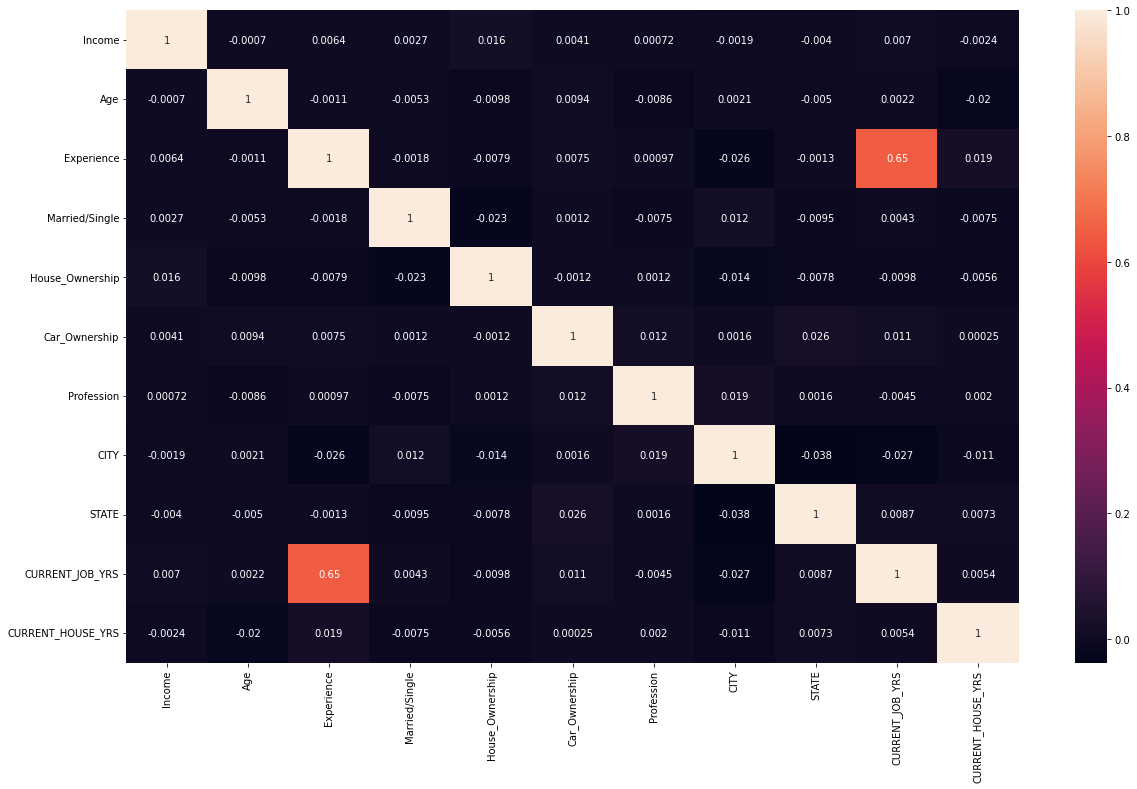

In [56]:
corr=train.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,12))
sns.heatmap(train[top_features].corr(),annot=True)

From above we can say that Current job years and experience are correlated so we can keep only one. 

In [57]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
correlation = correlation(train,0.60)
correlation

{'CURRENT_JOB_YRS'}

In [59]:
# dropping that column
train = train.drop(correlation,axis=1)
test = test.drop(correlation,axis=1)

# ML training by Correlation features

In [61]:
Xtrain,ytrain,Xval,yval,xtest,ytest = DataPreprocessing(train,test)

+-------+--------------+
|  Data |    Shape     |
+-------+--------------+
| Train | (252000, 11) |
|  Test | (28000, 11)  |
+-------+--------------+
+-----------------------------+--------------+
| Data after train_test_split |    Shape     |
+-----------------------------+--------------+
|            Xtrain           | (201600, 10) |
|            ytrain           |  (201600,)   |
|             Xval            | (50400, 10)  |
|             yval            |   (50400,)   |
|            Xtest            | (28000, 10)  |
|            ytest            |   (28000,)   |
+-----------------------------+--------------+


In [62]:
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.94  |
|  Precision   |   0.71  |
|    Recall    |   0.80  |
+--------------+---------+
--------------------- Val REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.90  |
|  Precision   |   0.60  |
|    Recall    |   0.53  |
+--------------+---------+
--------------------- TEST REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.86  |
|  Precision   |   0.15  |
|    Recall    |   0.01  |
+--------------+---------+


# ML training by Selectkbest features

In [65]:
col = ['Profession','STATE','Married/Single','House_Ownership','CURRENT_HOUSE_YRS']

train = train.drop(col,axis=1)
test = test.drop(col,axis=1)
Xtrain,ytrain,Xval,yval,xtest,ytest = DataPreprocessing(train,test)


+-------+-------------+
|  Data |    Shape    |
+-------+-------------+
| Train | (252000, 6) |
|  Test |  (28000, 6) |
+-------+-------------+
+-----------------------------+-------------+
| Data after train_test_split |    Shape    |
+-----------------------------+-------------+
|            Xtrain           | (201600, 5) |
|            ytrain           |  (201600,)  |
|             Xval            |  (50400, 5) |
|             yval            |   (50400,)  |
|            Xtest            |  (28000, 5) |
|            ytest            |   (28000,)  |
+-----------------------------+-------------+


In [66]:
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.94  |
|  Precision   |   0.71  |
|    Recall    |   0.81  |
+--------------+---------+
--------------------- Val REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.90  |
|  Precision   |   0.60  |
|    Recall    |   0.54  |
+--------------+---------+
--------------------- TEST REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.86  |
|  Precision   |   0.11  |
|    Recall    |   0.01  |
+--------------+---------+


# ML training by Extra tree classifier features

In [75]:
# selecting values below 0.001
col = ['CURRENT_JOB_YRS','Car_Ownership','Married/Single','House_Ownership','CURRENT_HOUSE_YRS']

df1 = train.copy()
df2 = test.copy()

train1 = df1.drop(col,axis=1)
test1 = df2.drop(col,axis=1)
Xtrain,ytrain,Xval,yval,xtest,ytest = DataPreprocessing(train1,test1)

+-------+-------------+
|  Data |    Shape    |
+-------+-------------+
| Train | (252000, 7) |
|  Test |  (28000, 7) |
+-------+-------------+
+-----------------------------+-------------+
| Data after train_test_split |    Shape    |
+-----------------------------+-------------+
|            Xtrain           | (201600, 6) |
|            ytrain           |  (201600,)  |
|             Xval            |  (50400, 6) |
|             yval            |   (50400,)  |
|            Xtest            |  (28000, 6) |
|            ytest            |   (28000,)  |
+-----------------------------+-------------+


In [76]:
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.94  |
|  Precision   |   0.71  |
|    Recall    |   0.81  |
+--------------+---------+
--------------------- Val REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.90  |
|  Precision   |   0.60  |
|    Recall    |   0.53  |
+--------------+---------+
--------------------- TEST REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.87  |
|  Precision   |   0.10  |
|    Recall    |   0.00  |
+--------------+---------+


# Model Training by Mutual info features

In [77]:
# selecting values below 0.001
col = ['STATE','Car_Ownership','CURRENT_JOB_YRS','Experience','Profession','Age']

df1 = train.copy()
df2 = test.copy()

train1 = df1.drop(col,axis=1)
test1 = df2.drop(col,axis=1)
Xtrain,ytrain,Xval,yval,xtest,ytest = DataPreprocessing(train1,test1)

+-------+-------------+
|  Data |    Shape    |
+-------+-------------+
| Train | (252000, 6) |
|  Test |  (28000, 6) |
+-------+-------------+
+-----------------------------+-------------+
| Data after train_test_split |    Shape    |
+-----------------------------+-------------+
|            Xtrain           | (201600, 5) |
|            ytrain           |  (201600,)  |
|             Xval            |  (50400, 5) |
|             yval            |   (50400,)  |
|            Xtest            |  (28000, 5) |
|            ytest            |   (28000,)  |
+-----------------------------+-------------+


In [78]:
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
ML(model,train=True,val=True,test=True)

--------------------- Train REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.94  |
|  Precision   |   0.71  |
|    Recall    |   0.81  |
+--------------+---------+
--------------------- Val REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.89  |
|  Precision   |   0.58  |
|    Recall    |   0.55  |
+--------------+---------+
--------------------- TEST REPORT --------------------------------------
+------------------------+
| RandomForestClassifier |
+--------------+---------+
|   Metrics    |  Score  |
+--------------+---------+
|   Accuracy   |   0.83  |
|  Precision   |   0.13  |
|    Recall    |   0.05  |
+--------------+---------+


# conclusion
Random Forest gave best reselect with feature selection (Extra tree classifier) got an accuracy of 87%